In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import re
import json

out_dir = './output/Training_models/06_22_bay_tune_retina_2class_set_I_aug/'
mod_dir = out_dir + 'retinanet_R_50_FPN_1x-20221021-195814'

df_parse = None
with open (mod_dir + '/metrics.json') as f:
    lines = f.read().split('\n')
    for i,l in enumerate(lines):
        if l:
            d = json.loads(l)
            if df_parse is None: 
                df_parse = pd.DataFrame(columns = list(d.keys()))
            try:
                df_parse.loc[len(df_parse.index)] = list(d.values())
            except:
                print(f'#{i} final results:')
                print(d)
    
print(list(df_parse))
df_curves = df_parse[['iteration','total_loss','loss_cls','loss_box_reg','validation_loss']]


#75 final results:
{'bbox/AP': 70.96137906095666, 'bbox/AP-ROT': 73.1262108872715, 'bbox/AP-SAT': 73.45640544619386, 'bbox/AP-Unknown Bird': 66.30152084940465, 'bbox/AP50': 93.85504435554776, 'bbox/AP75': 83.13109273359228, 'bbox/APl': 42.2917481032415, 'bbox/APm': 72.06904253118435, 'bbox/APs': 13.562744045455046, 'iteration': 1500}
['data_time', 'eta_seconds', 'iteration', 'loss_box_reg', 'loss_cls', 'lr', 'num_pos_anchors', 'time', 'timetest', 'total_loss', 'validation_loss']


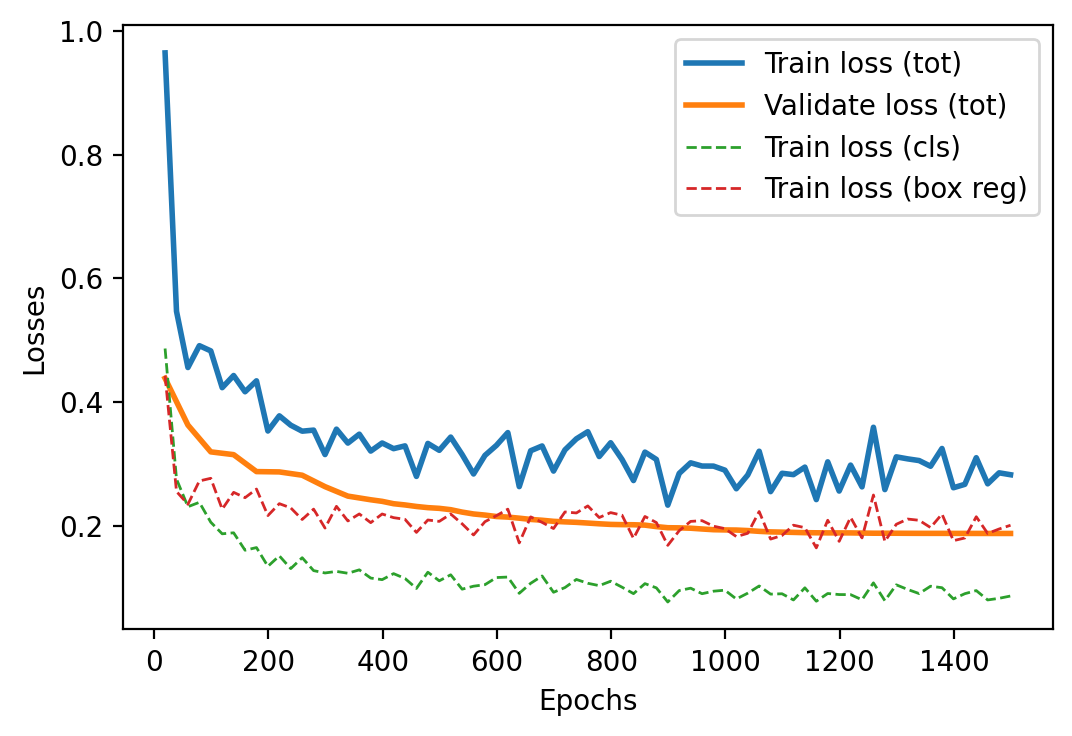

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=200)
iters = df_curves.iteration.values.astype(int)
plt.plot(iters, df_curves.total_loss.values.astype(float), label = 'Train loss (tot)', lw=2)
plt.plot(iters, df_curves.validation_loss.values.astype(float), label = 'Validate loss (tot)', lw=2)
plt.plot(iters, df_curves.loss_cls.values.astype(float), label = 'Train loss (cls)', ls='--', lw=1)
plt.plot(iters, df_curves.loss_box_reg.values.astype(float), label = 'Train loss (box reg)', ls='--', lw=1)

plt.xlabel('Epochs')
plt.ylabel('Losses')
# plt.ylim(0.1, 1.8)

plt.legend()
plt.show()

## Evaluation results

Loading config /home/appuser/detectron2_repo/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[10/28 15:12:56 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                       | Names in Checkpoint                                                                                  | Shapes                                          |
|:-------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*    | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*    | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*    | backbone.bottom_up.res2.0.conv3.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight

validation inference:
[10/28 15:12:56 d2.evaluation.coco_evaluation]: Trying to convert 'birds_species_Validate' to COCO format ...
[10/28 15:12:56 d2.data.datasets.coco]: Converting annotations of dataset 'birds_species_Validate' to COCO format ...)
[10/28 15:13:00 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/28 15:13:01 d2.data.datasets.coco]: Conversion finished, #images: 655, #annotations: 11615
[10/28 15:13:01 d2.data.datasets.coco]: Caching COCO format annotations at './output/Training_models/06_22_bay_tune_retina_2class_set_I_aug/retinanet_R_50_FPN_1x-20221028-151254/birds_species_Validate_coco_format.json' ...
[10/28 15:13:05 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |   category   | #instances   |
|:----------:|:-------------|:----------:|:-------------|:------------:|:-------------|
|    ROT     | 7014         |    SAT     | 4063         | Unknown Bird | 538          |
|  

/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/28 15:13:06 d2.evaluation.evaluator]: Inference done 11/655. Dataloading: 0.0149 s/iter. Inference: 0.0352 s/iter. Eval: 0.0002 s/iter. Total: 0.0503 s/iter. ETA=0:00:32
[10/28 15:13:11 d2.evaluation.evaluator]: Inference done 104/655. Dataloading: 0.0184 s/iter. Inference: 0.0354 s/iter. Eval: 0.0002 s/iter. Total: 0.0540 s/iter. ETA=0:00:29
[10/28 15:13:16 d2.evaluation.evaluator]: Inference done 198/655. Dataloading: 0.0181 s/iter. Inference: 0.0354 s/iter. Eval: 0.0002 s/iter. Total: 0.0537 s/iter. ETA=0:00:24
[10/28 15:13:21 d2.evaluation.evaluator]: Inference done 292/655. Dataloading: 0.0179 s/iter. Inference: 0.0354 s/iter. Eval: 0.0002 s/iter. Total: 0.0536 s/iter. ETA=0:00:19
[10/28 15:13:26 d2.evaluation.evaluator]: Inference done 386/655. Dataloading: 0.0179 s/iter. Inference: 0.0355 s/iter. Eval: 0.0002 s/iter. Total: 0.0536 s/iter. ETA=0:00:14
[10/28 15:13:31 d2.evaluation.evaluator]: Inference done 480/655. Dataloading: 0.0179 s/iter. Inference: 0.0355 s/iter. Eval: 

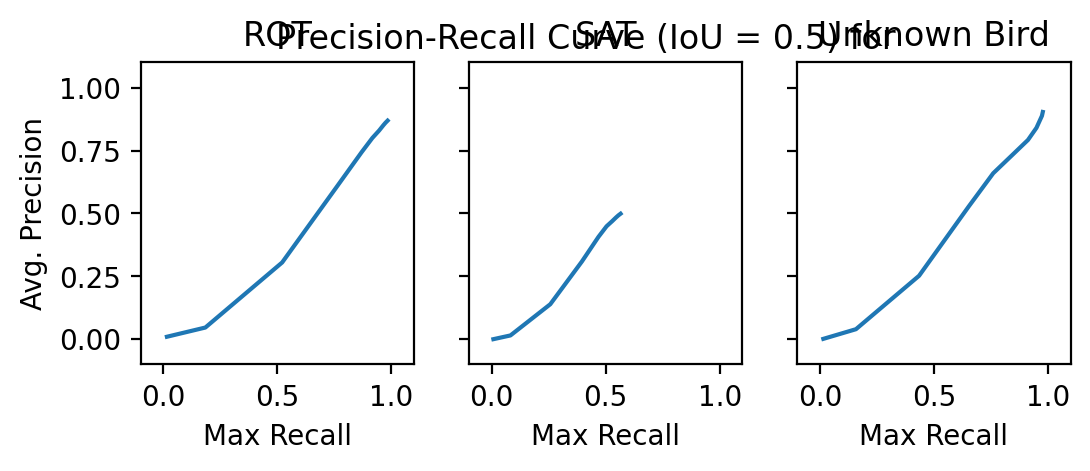

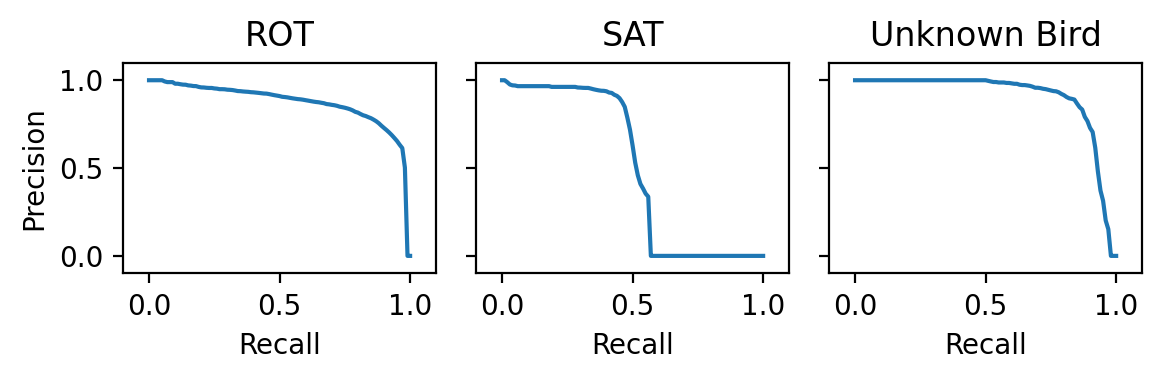

{'AP': {'ROT': 0.8687806178857393,
  'SAT': 0.4989733597087857,
  'Unknown Bird': 0.9032072435076682},
 'AR': {'ROT': 0.9833190761334474,
  'SAT': 0.5653458035934039,
  'Unknown Bird': 0.9776951672862454}}

In [3]:
from detectron2.engine import DefaultPredictor
from utils.evaluation import plot_precision_recall_2, get_precisions_recalls
from utils.hyperparameter import setup1
from utils.dataloader import register_datasets

# Retrieve training parameters
with open(mod_dir + '/parameters.txt') as f:
    cfg_parms = json.loads(f.read())
cfg = setup1(cfg_parms)
cfg.MODEL.WEIGHTS = mod_dir + "/model_final.pth" #"/model_0000898.pth" #"/model_final.pth" # path to the model we just trained
predictor = DefaultPredictor(cfg)

# Register datasets for detectron2
data_dir = "./data/22F_new/split/" # NOTE!! CHANGE TO YOUR DATA DIR!!
img_ext = '.JPEG'
dirs_full = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if not d.startswith('.') and not d.startswith('_')]
register_datasets(dirs_full, img_ext, cfg_parms['BIRD_SPECIES'], unknown_bird_category=True,
                  bird_species_colors=[(0,0,0)]*len(cfg_parms['BIRD_SPECIES']), phase='Validate')

##
print('validation inference:')
val_precisions, val_max_recalls = get_precisions_recalls(cfg, predictor, "birds_species_Validate")
plot_precision_recall_2(val_precisions, val_max_recalls, cfg_parms['BIRD_SPECIES'] + ["Unknown Bird"],
                      [(0,0,0)]*(len(cfg_parms['BIRD_SPECIES'])+1))

# print('test inference:')
# test_precisions, test_max_recalls = get_precisions_recalls(cfg, predictor, "birds_species_Test")
# plot_precision_recall_2(test_precisions, test_max_recalls, cfg_parms['BIRD_SPECIES'] + ["Unknown Bird"],
#                       [(0,0,0)]*(len(cfg_parms['BIRD_SPECIES'])+1))


In [4]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from utils.confusion_matrix_birds import confusion_matrix_report


data = DatasetCatalog.get("birds_species_Validate")

# grab the confusion matrix
pred_total, truth_total = confusion_matrix_report(data, predictor, 
      cfg_parms['BIRD_SPECIES']+["Unknown Bird"], img_ext='JPEG')



  0%|          | 0/655 [00:00<?, ?it/s]

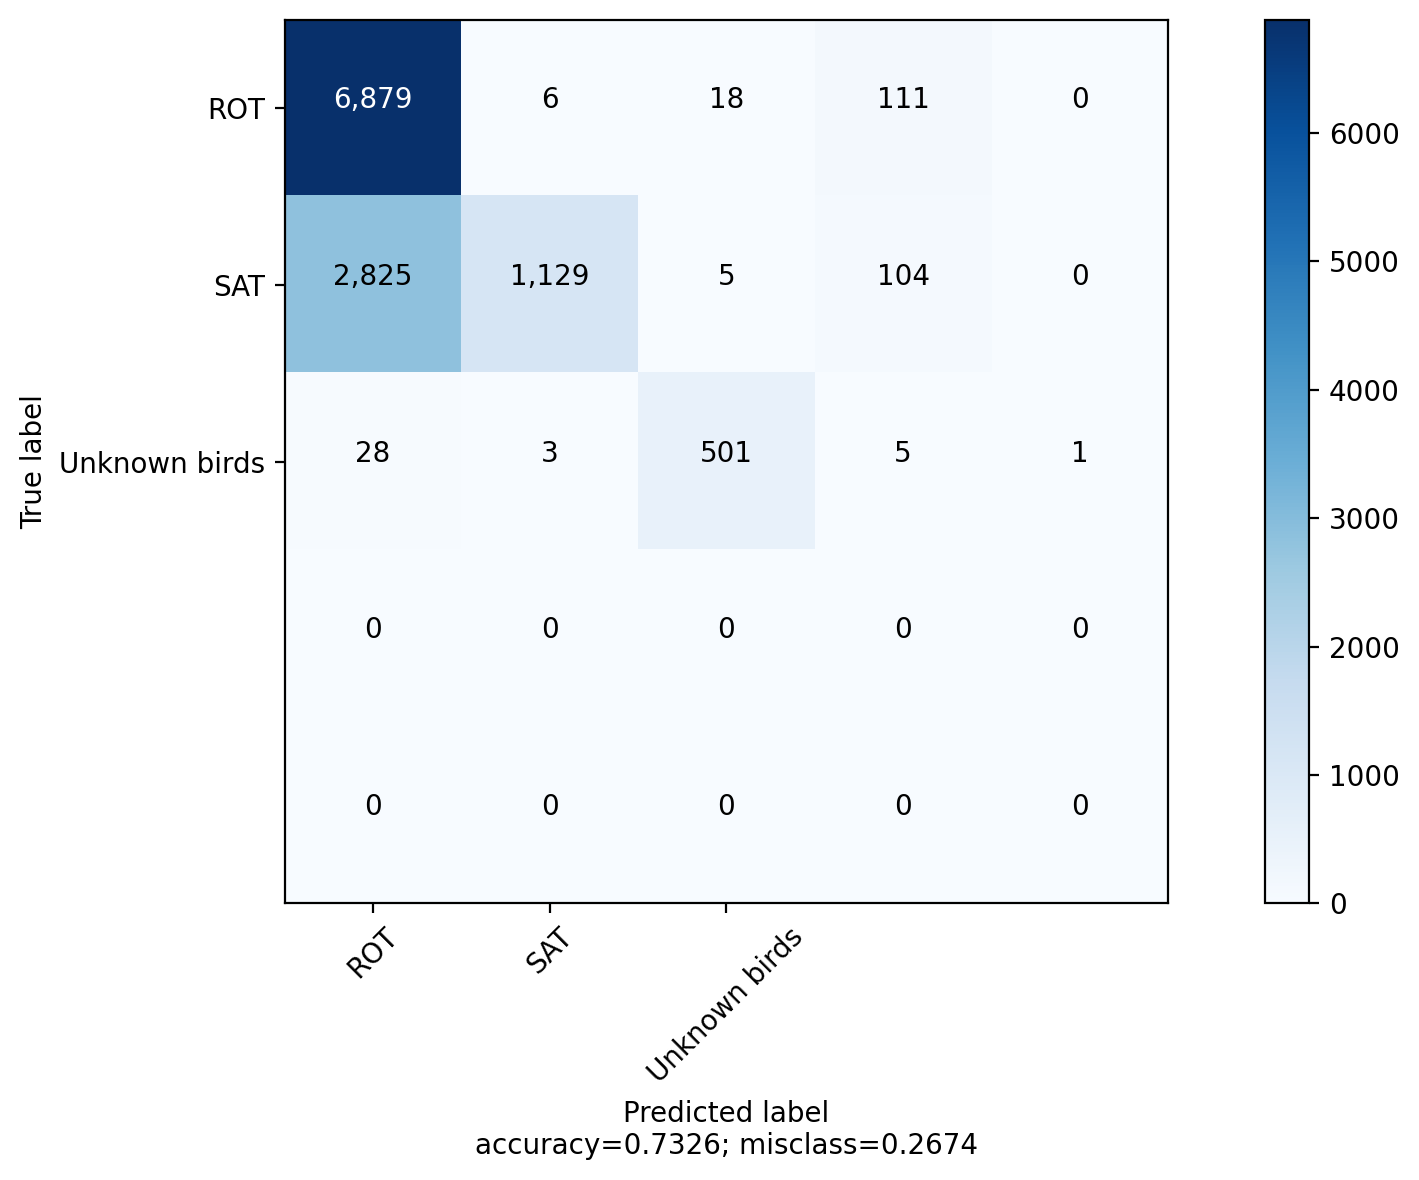

In [5]:

from sklearn.metrics import confusion_matrix, classification_report
from utils.confusion_matrix_birds import plot_confusion_matrix

cm = confusion_matrix(truth_total, pred_total)

fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=200)
plot_confusion_matrix(cm, cfg_parms['BIRD_SPECIES']+['Unknown birds'], title='', 
                      figure=(fig, ax), normalize=False)



 Validate examples:


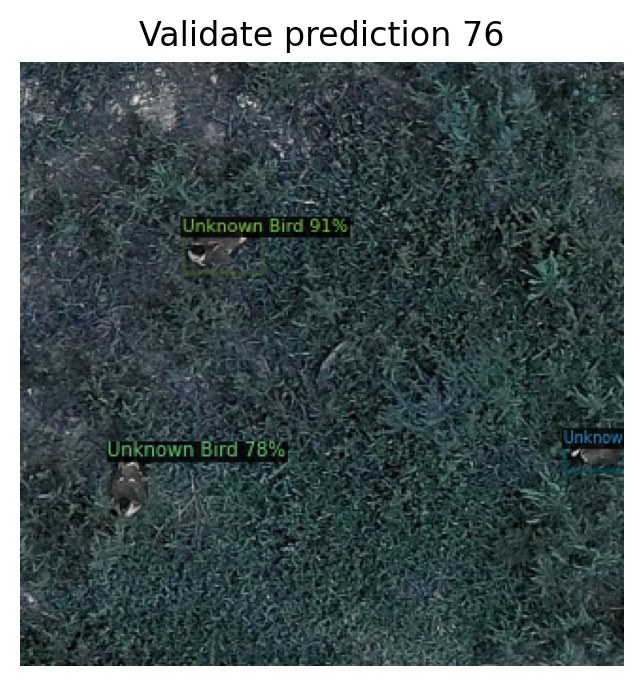

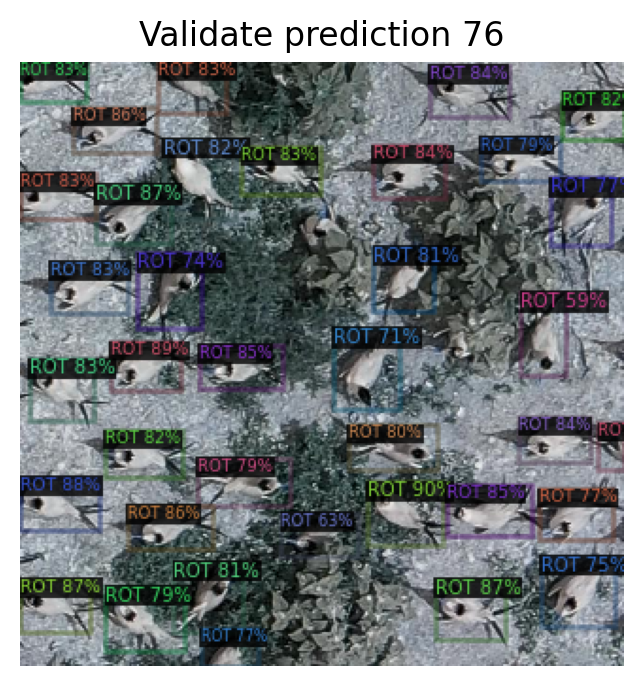

In [14]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer,ColorMode

# Plot examples of detections on validation and testing tiled images 
for d in ["Validate"]:#, "Test"]:
    dataset_dicts = DatasetCatalog.get(f"birds_species_{d}")
    print(f'\n {d} examples:')
    for k in random.sample(dataset_dicts, 2):
        im = cv2.imread(k["file_name"])
        outputs = predictor(im)
        outputs = outputs["instances"].to("cpu")
        outputs = outputs[outputs.scores > 0.5]
        v = Visualizer(im[:, :, ::-1],
                        metadata=MetadataCatalog.get(f"birds_species_{d}"),
                        scale=0.5,
                        instance_mode=ColorMode.SEGMENTATION)
        out = v.draw_instance_predictions(outputs)
        
        plt.figure(dpi=200)
        plt.imshow(out.get_image()[:, :, ::-1])
        plt.axis('off')
        plt.title(f'{d} prediction {i}')
        
        